# **Deep learning project**

Our project goal is to detect whether there's violent behaviors happening in the surveillance cameras.


# Data preprocessing

This dataset collects raw surveillance videos from YouTube, slices them into segments within 5 seconds at 30 fps, and marks each segment as violent or non-violent. The author also deleted the duplicate content that appeared in the training set and the validation set. In the end, we got a dataset of 2000 clips and 300,000 frames for real-world violence detection under surveillance cameras. We use 400 of them to form our tast set and 1600 for our train and validation set.

We finish our task of data proprecessing in our local environment. As our raw videos are of different widths and heights, we first convert them into the same sizes by using the video transforming software. We extract the frames from each video and save them into 'jpg' files. Each video will be converted to 150 'jpg' images and saved in individual folders. In this part, we also create the corresponding annotation 'csv' files for train set and test set. These annotation files are used to create datasets in the later part.

We write the following five Python programs to do data preprocessing:

Video2Image.py: extract the frames from videos, and save them into 'jpg' files. We convert 40 videos at once. If we convert hundreds of videos for one time, the program will run slower and slower. After this processing operation, we get 8 folders for our test set and 40 folders for our train and validation set.

MoveImages.py: move the test images into one folder, and move the train set to another folder. After this processing operation, we get 60,000 images for our test set and 240,000 images for our training data.

MoveToSubfolder.py: move images to sub-folders. Each sub-folder represent one video, so each sub-folder contains 150 images. After this processing operation, we get 400 sub-folders for test set and 1600 sub-folders for training data.

Augmentation.py: to get more training data, we also do the data augmentaion by horizontally flipping each frame of the training data and save them into new sub-folders. After this processing operation, we get 3200 sub-folders for training data.

CreateAnno.py: create the corresponding annotation 'csv' files for both test set and training data. These will be used when read the data during training.

After all these preprocessing, eventually we get 400 data points for testing and 3200 data points for training, which contains 60,000 and 480,000 images respectively. We then upload all the data sets and the annotation files to our google drive.

# Data loading

First we mount our google drive so that we can read and unzip our datasets directly from it.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


We download the annotaion files and a Python program. This Python program is used for earlystopping.

In [2]:
import os
import torch.nn as nn
import torch
os.chdir("/content/sample_data")
!gdown --id '1yUSgAgxuHip6VZBKGz6wV_smSrjuE7oJ' --output train_anno.csv
!gdown --id '1n4kV8ZgxcsBxjunoxR2Ll2-450fK_aAK' --output val_anno.csv
!gdown --id '1bDXDc7jIOBQPL7W8rQkbV1dlIC3Xal1T' --output pytorchtools.py

Downloading...
From: https://drive.google.com/uc?id=1yUSgAgxuHip6VZBKGz6wV_smSrjuE7oJ
To: /content/sample_data/train_anno.csv
100% 40.5k/40.5k [00:00<00:00, 15.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n4kV8ZgxcsBxjunoxR2Ll2-450fK_aAK
To: /content/sample_data/val_anno.csv
100% 3.89k/3.89k [00:00<00:00, 6.00MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bDXDc7jIOBQPL7W8rQkbV1dlIC3Xal1T
To: /content/sample_data/pytorchtools.py
100% 2.11k/2.11k [00:00<00:00, 1.94MB/s]


In [3]:
os.chdir("/content/gdrive/MyDrive/imageData")
# !ls '/content/gdrive/MyDrive'

Unzip the data. Use a counter and print the total number of unzipped files to verify whether our program is correct. The total number will be the number of image files and the number of folders.

In [4]:
import zipfile
def unzip_file(zip_src, dst_dir):
    if zipfile.is_zipfile(zip_src): 
        i=1    
        fz = zipfile.ZipFile(zip_src, 'r')
        for file in fz.namelist():
            fz.extract(file, dst_dir) 
            print(i) 
            i+=1     
    else:
        print('This is not zip')

unzip_file('valimage.zip','/content/sample_data/valData/')
print('ValData finish')
unzip_file('trainimage.zip','/content/sample_data/trainData/')
print('trainData finish')

流式输出内容被截断，只能显示最后 5000 行内容。
478202
478203
478204
478205
478206
478207
478208
478209
478210
478211
478212
478213
478214
478215
478216
478217
478218
478219
478220
478221
478222
478223
478224
478225
478226
478227
478228
478229
478230
478231
478232
478233
478234
478235
478236
478237
478238
478239
478240
478241
478242
478243
478244
478245
478246
478247
478248
478249
478250
478251
478252
478253
478254
478255
478256
478257
478258
478259
478260
478261
478262
478263
478264
478265
478266
478267
478268
478269
478270
478271
478272
478273
478274
478275
478276
478277
478278
478279
478280
478281
478282
478283
478284
478285
478286
478287
478288
478289
478290
478291
478292
478293
478294
478295
478296
478297
478298
478299
478300
478301
478302
478303
478304
478305
478306
478307
478308
478309
478310
478311
478312
478313
478314
478315
478316
478317
478318
478319
478320
478321
478322
478323
478324
478325
478326
478327
478328
478329
478330
478331
478332
478333
478334
478335
478336
478337
478338
478339
478340


The following commented out codes are the methods we use to do data preprocessing described in the project update document before. We try to convert our videos into the frames of same size by our own Python programs. But for different original sizes, we have to use different kernel sizes and striding value, which is very inefficient. The program also runs very slow. Besides, after we get the video frames, we save them into Numpy files. When we are training our model, we have to read these numpy files one by one, which takes lots of memory and time. So we finally abandon this data processing approach.

In [5]:
# !pip3 install rarfile 
# !pip3 install av

In [6]:
#@title
# !gdown --id '1JgIgX7FXjE9m7PvOoPCole98jg5X7VK8' --output train_fight.zip
# !gdown --id '1gs56SCG3_XiSmKtrfPy5XhFu9sR3WQMq' --output train_nonfight.zip
# !gdown --id '10bYI_FbGu4h6uI8Ui-5H8heqDboI6ov3' --output val_fight.zip
# !gdown --id '1Psr4mg5NKyTmuZOtTSO5PJxFZp2oM3qR' --output val_nonfight.zip

In [7]:
# import Video2Tensor

In [8]:
# def find_kernal_stride(h,m):
#   global Target_h
#   global Target_m
#   Stride1=0
#   Stride2=0
#   for s in range(1,11):
#     K1=h-(Target_h-1)*s-2
#     if (K1<100) and (K1>0):
#       Stride1=s
#       break
#   for s in range(2,20):
#     K2=m-(Target_m-1)*s-2
#     if (K2<120) and (K2>0):
#       Stride2=s
#       break

#   return K1,K2,Stride1,Stride2

# def V2T(file):
#   # global Target_h
#   # global Target_m
#   Frames = Video2Tensor.get_tensor_from_video(file)
#   Frames = Frames.permute(3, 0, 1, 2)
#   # c,d,h,m=Frames.size()
#   # K1,K2,Stride1,Stride2=find_kernal_stride(h,m)
#   # Frames = Frames.float()
#   # Pre_ap = nn.AvgPool3d(kernel_size=[1, K1, K2], stride=[1, Stride1, Stride2], padding=0)
#   # print(Frames.size())
#   # print(K1,K2)
#   # Frames = Pre_ap(Frames)
  
#   # Frames = Frames[:,:,0:Target_h, 0:Target_m]
#   Frames=Frames.reshape([1, 3, 150, Target_h, Target_m])
#   # print(Frames.size())
#   return Frames

# def V_Convert_T(path,piece=0):
#   i=1
#   global Target_h
#   global Target_m
#   MTensor=torch.Tensor()
#   if piece==0:
#     for root, dirs, files in os.walk(path):

#       for f in files:
        
#         MTensor=torch.cat([MTensor,V2T(os.path.join(root, f))])
#         print(i,'in',len(files))
#         i+=1
#         # if i>3:
#         #   break
#       print(MTensor.size())
#   else:
#     for root, dirs, files in os.walk(path):

#       for f in files[(piece-1)*200:piece*200]:
        
#         MTensor=torch.cat([MTensor,V2T(os.path.join(root, f))])
#         print(i,'in',200)
#         i+=1
#         # if i>3:
#         #   break
#       print(MTensor.size())
#   return MTensor

In [9]:
# Target_h=96
# Target_m=128

# path1='/content/sample_data/val_nonfight/'
# path2='/content/sample_data/val_fight/'
# path3='/content/sample_data/train_nonfight/'
# path4='/content/sample_data/train_fight/'




In [10]:
# val_nonfight=V_Convert_T(path1)
# val_fight=V_Convert_T(path2)

In [11]:
# train_nonfight1=V_Convert_T(path3,1)
# train_nonfight2=V_Convert_T(path3,2)
# train_nonfight3=V_Convert_T(path3,3)
# train_nonfight4=V_Convert_T(path3,4)
# import numpy
# os.chdir("/content/gdrive/MyDrive")
# train_nonfight1=train_nonfight1.cpu().numpy()
# numpy.save("train_nonfight1.npy",train_nonfight1)
# train_nonfight2=train_nonfight2.cpu().numpy()
# numpy.save("train_nonfight2.npy",train_nonfight2)
# train_nonfight3=train_nonfight3.cpu().numpy()
# numpy.save("train_nonfight3.npy",train_nonfight3)
# train_nonfight4=train_nonfight4.cpu().numpy()
# numpy.save("train_nonfight4.npy",train_nonfight4)

In [12]:
# train_nonfight1=numpy.load("train_nonfight1.npy")
# train_nonfight2=numpy.load("train_nonfight2.npy")
# train_nonfight3=numpy.load("train_nonfight3.npy")
# train_nonfight4=numpy.load("train_nonfight4.npy")

# numpy.size(train_nonfight3)

# train_nonfight5=numpy.concatenate((train_nonfight5,train_nonfight3))
# train_nonfight5.shape

# train_nonfight=torch.cat([train_nonfight1,train_nonfight2,
#                           train_nonfight3,train_nonfight4])
# print(train_nonfight.size())
# import gc
# del train_nonfight1,train_nonfight2,train_nonfight3,train_nonfight4
# gc.collect()

In [13]:
# train_fight1=V_Convert_T(path4,1)
# train_fight2=V_Convert_T(path4,2)
# train_fight3=V_Convert_T(path4,3)
# train_fight4=V_Convert_T(path4,4)
# import numpy
# os.chdir("/content/gdrive/MyDrive")
# train_fight1=train_fight1.cpu().numpy()
# numpy.save("train_fight1.npy",train_fight1)
# train_fight2=train_fight2.cpu().numpy()
# numpy.save("train_fight2.npy",train_fight2)
# train_fight3=train_fight3.cpu().numpy()
# numpy.save("train_fight3.npy",train_fight3)
# train_fight4=train_fight4.cpu().numpy()
# numpy.save("train_fight4.npy",train_fight4)

In [14]:
# train_fight=torch.cat([train_fight1,train_fight2, train_fight3,train_fight4])
# print(train_fight.size())

# import gc
# del train_fight1, train_fight2, train_fight3, train_fight4
# gc.collect()

In [15]:
# os.chdir("/content/gdrive/MyDrive")
# VN=val_nonfight.data.cpu().numpy()
# numpy.save("VN.npy",VN)
# VF=val_fight.data.cpu().numpy()
# numpy.save("VF.npy",VF)
# TN=train_nonfight.data.cpu().numpy()
# numpy.save("TN.npy",TN)
# TF=train_fight.data.cpu().numpy()
# numpy.save("TF.npy",TF)


# Create Dataloader

We rewrite the Dataset class in pytorch to create our customized image dataset. We use the annotoatiuon file locate the data and read its corresponding label. Every item returned by \_\_getitem__ is a tensor variable with the size [1, 150, 96, 128].

In [16]:
import torch.nn as nn
import torch
import numpy
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, header=None)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        label = self.img_labels.iloc[idx, 1]
        Video=torch.Tensor()
        for i in range(150):
          img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0], 
                                  self.img_labels.iloc[idx, 0]+'_'+str(i).zfill(3)+'.jpg')
          image = read_image(img_path)
          Video = torch.cat((Video,image))
          if self.transform:
              image = self.transform(image)
        Video = Video.unsqueeze(0)

        label = self.img_labels.iloc[idx, 1]
        if self.target_transform:
            label = self.target_transform(label)  

        return Video, label

In [17]:
os.chdir("/content/sample_data")
train_path='/content/sample_data/trainData/'
val_path='/content/sample_data/valData/'
train_anno='/content/sample_data/train_anno.csv'
val_anno='/content/sample_data/val_anno.csv'

We use 3/4 of our train set as our training data, and rest of it as our validation data.

In [18]:
train_data=CustomImageDataset(train_anno,train_path)
train_size = int(3/4 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data=torch.utils.data.random_split(train_data, [train_size, val_size], 
    generator=torch.Generator().manual_seed(1234))
test_data=CustomImageDataset(val_anno,val_path)
len(train_data),len(val_data),len(test_data)

(2400, 800, 400)

We use a batch size of 20, and shuffle the training data. Larger batch size requires more memory.

In [19]:
from torch.utils.data import DataLoader

Batch_size = 20

train_dataloader = DataLoader(train_data, batch_size=Batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=Batch_size, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=Batch_size, shuffle=False)

In [20]:
# train_features, train_labels = next(iter(train_dataloader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")

In [21]:
# import matplotlib.pyplot as plt
# img = train_features[6][100].squeeze()
# label = train_labels[0]
# plt.imshow(img, cmap="gray")
# plt.show()
# print(f"Label: {label}")

# Model training

We use 3D-Resnet as our training model. One block in the network architecture is defined as BasicBlock or Bottleneck.

In [22]:
import math
from functools import partial

import torch
import torch.nn as nn
import torch.nn.functional as F


def get_inplanes():
    return [64, 128, 256, 512]


def conv3x3x3(in_planes, out_planes, stride=1):
    return nn.Conv3d(in_planes,
                     out_planes,
                     kernel_size=3,
                     stride=stride,
                     padding=1,
                     bias=False)


def conv1x1x1(in_planes, out_planes, stride=1):
    return nn.Conv3d(in_planes,
                     out_planes,
                     kernel_size=1,
                     stride=stride,
                     bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, downsample=None):
        super().__init__()

        self.conv1 = conv3x3x3(in_planes, planes, stride)
        self.bn1 = nn.BatchNorm3d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3x3(planes, planes)
        self.bn2 = nn.BatchNorm3d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)
        
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1, downsample=None):
        super().__init__()

        self.conv1 = conv1x1x1(in_planes, planes)
        self.bn1 = nn.BatchNorm3d(planes)
        self.conv2 = conv3x3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm3d(planes)
        self.conv3 = conv1x1x1(planes, planes * self.expansion)
        self.bn3 = nn.BatchNorm3d(planes * self.expansion, track_running_stats=False)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride


    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)


        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
 

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self,
                 block,
                 layers,
                 block_inplanes,
                 n_input_channels=1,
                 conv1_t_size=7,
                 conv1_t_stride=1,
                 no_max_pool=False,
                 shortcut_type='B',
                 widen_factor=1.0,
                 n_classes=1):
        super().__init__()

        block_inplanes = [int(x * widen_factor) for x in block_inplanes]

        self.in_planes = block_inplanes[0]
        self.no_max_pool = no_max_pool

        

        self.conv1 = nn.Conv3d(n_input_channels,
                               self.in_planes,
                               kernel_size=(conv1_t_size, 7, 7),
                               stride=(conv1_t_stride, 2, 2),
                               padding=(conv1_t_size // 2, 3, 3),
                               bias=False)
       
        self.bn1 = nn.BatchNorm3d(self.in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool3d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, block_inplanes[0], layers[0],
                                       shortcut_type)
        self.layer2 = self._make_layer(block,
                                       block_inplanes[1],
                                       layers[1],
                                       shortcut_type,
                                       stride=2)
        self.layer3 = self._make_layer(block,
                                       block_inplanes[2],
                                       layers[2],
                                       shortcut_type,
                                       stride=2)
        self.layer4 = self._make_layer(block,
                                       block_inplanes[3],
                                       layers[3],
                                       shortcut_type,
                                       stride=2)

        self.avgpool = nn.AdaptiveAvgPool3d((1, 1, 1))
        self.fc = nn.Linear(block_inplanes[3] * block.expansion, n_classes)
        

        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                nn.init.kaiming_normal_(m.weight,
                                        mode='fan_out',
                                        nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm3d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _downsample_basic_block(self, x, planes, stride):
        out = F.avg_pool3d(x, kernel_size=1, stride=stride)
        zero_pads = torch.zeros(out.size(0), planes - out.size(1), out.size(2),
                                out.size(3), out.size(4))
        if isinstance(out.data, torch.cuda.FloatTensor):
            zero_pads = zero_pads.cuda()

        out = torch.cat([out.data, zero_pads], dim=1)

        return out

    def _make_layer(self, block, planes, blocks, shortcut_type, stride=1):
        downsample = None
        if stride != 1 or self.in_planes != planes * block.expansion:
            if shortcut_type == 'A':
                downsample = partial(self._downsample_basic_block,
                                     planes=planes * block.expansion,
                                     stride=stride)
            else:
                downsample = nn.Sequential(
                    conv1x1x1(self.in_planes, planes * block.expansion, stride),
                    nn.BatchNorm3d(planes * block.expansion))

        layers = []
        layers.append(
            block(in_planes=self.in_planes,
                  planes=planes,
                  stride=stride,
                  downsample=downsample))
        self.in_planes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.in_planes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        if not self.no_max_pool:
            x = self.maxpool1(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)

        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


def generate_model(model_depth, **kwargs):
    assert model_depth in [10, 18, 34, 50, 101, 152, 200]

    if model_depth == 10:
        model = ResNet(BasicBlock, [1, 1, 1, 1], get_inplanes(), **kwargs)
    elif model_depth == 18:
        model = ResNet(BasicBlock, [2, 2, 2, 2], get_inplanes(), **kwargs)
    elif model_depth == 34:
        model = ResNet(BasicBlock, [3, 4, 6, 3], get_inplanes(), **kwargs)
    elif model_depth == 50:
        model = ResNet(Bottleneck, [3, 4, 6, 3], get_inplanes(), **kwargs)
    elif model_depth == 101:
        model = ResNet(Bottleneck, [3, 4, 23, 3], get_inplanes(), **kwargs)
    elif model_depth == 152:
        model = ResNet(Bottleneck, [3, 8, 36, 3], get_inplanes(), **kwargs)
    elif model_depth == 200:
        model = ResNet(Bottleneck, [3, 24, 36, 3], get_inplanes(), **kwargs)

    return model



We initialize the Resnet50 model as our training model.

In [23]:
Resnet=generate_model(50)

We calculate the total number of trainable parameters of our model.

In [24]:
Sum=0
for param in Resnet.parameters():
    Sum+=len(param.reshape(-1))
print(Sum)
# print(type(Frames))

46157121


We try to use Xavier initialization as one of our option.

In [25]:
# def init_weights(m):
#     if type(m) == nn.Linear:
#         torch.nn.init.xavier_normal_(m.weight)
#         m.bias.data.fill_(0)   
# Resnet.apply(init_weights) 

We've tried many learning rates, and if we set the initial learning rate 0.001, it will work well for SGD optimizer. For Adam optimizer, the initial learning rate should be set 0.0001. We use the learning rate scheduler to adjust the learning rate during the training. We use BCEWithLogitsLoss as our loss function. We also use earlystopping to prevent overfitting. Note that we use half precision to allow larger batch sizes.

In [26]:
import os
os.chdir("/content/sample_data")
import torch.optim as optim
from pytorchtools import EarlyStopping
from torch.optim.lr_scheduler import ReduceLROnPlateau

initial_lr = 0.0001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

optimizer = optim.Adam(Resnet.parameters(), lr=initial_lr, betas=(0.8, 0.99), eps=1e-3, weight_decay=0.1)
# optimizer = optim.SGD(Resnet.parameters(), lr=initial_lr, momentum=0.9, weight_decay=0.1)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, 
                              patience=5, verbose=True, threshold=0.01, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

criterion = nn.BCEWithLogitsLoss()
# criterion = nn.BCELoss()

Resnet.half()

Resnet = Resnet.to(device)
criterion = criterion.to(device)
patience = 15
early_stopping = EarlyStopping(patience, verbose=True, delta=0.01)

Define a function to calculate binary accuracy.

In [27]:
def binary_accuracy(y_pred, y):
    
    
    Y=[]
    for i in y_pred:
        if i<0.5:
            Y.append(0)
        else:
            Y.append(1)
    Y_pred=torch.tensor(Y).to(device)
    correct = Y_pred.eq(y.view_as(Y_pred)).sum()
    acc = correct.float() / y.shape[0]
  

    return acc



Training mothod. We also need to use the half percision for the input data. We print the loss and accuracy for every batch.

In [28]:
import torch.utils.data as Data

def train(model, TrainLoader, optimizer, criterion):
    step = 1
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()

    iter_source = iter(TrainLoader)
    num_iter = len(TrainLoader)

    for i in range(0, num_iter):
        x, y = iter_source.next()

        x = x.half().to(device)
        # x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
        
        y_pred = model(x)
        y_pred = y_pred.reshape(-1)

        # print(y.size())
        # print(y_pred.size())
        # print(y_pred,y)

        loss = criterion(y_pred, y.float().half())
        # loss = criterion(y_pred, y.float())

        acc = binary_accuracy(y_pred, y)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

        print('In one Epoch:{}/{}, step_loss:{}, step_acc:{}'.format(step, num_iter, loss.item(), acc.item()))
        step+=1
  
    
        
    return epoch_loss / num_iter, epoch_acc / num_iter

Evaluating mothod. This is used for both validation set and test set.

In [29]:
def evaluate(model, TestLoader, criterion):
    
     
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    iter_source = iter(TestLoader)
    num_iter = len(TestLoader)

    # step = 1

    with torch.no_grad():
        
         for i in range(0, num_iter):
            x, y = iter_source.next()

            x = x.half().to(device)
            # x = x.to(device)
            y = y.to(device)
            
            y_pred = model(x)
            y_pred = y_pred.reshape(-1)

            loss = criterion(y_pred, y.float().half())
            # loss = criterion(y_pred, y.float())

            acc = binary_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            # print('Epoch:{}/{}, step_loss:{}, step_acc:{}'.format(step, num_iter, loss.item(), acc.item()))
            # step+=1
        
    return epoch_loss / num_iter, epoch_acc / num_iter

Keep tracking the running time for every epoch.

In [30]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

Train our model. We compare the validation loss with the best loss at the end of each epoch. If validation loss is improved, we save the model. After this we also apply earlystopping and learning rate scheduler metrics.

In [31]:
import os
import numpy
os.chdir("/content/gdrive/MyDrive")
N_EPOCHS = 100

best_valid_loss = float('inf')
Train_loss=[]
Train_acc=[]
Valid_loss=[]
Valid_acc=[]
for epoch in range(N_EPOCHS):

  start_time = time.time()

  train_loss, train_acc = train(Resnet, train_dataloader, optimizer, criterion)

  val_loss, val_acc = evaluate(Resnet, val_dataloader, criterion)

  end_time = time.time()
      
  epoch_mins, epoch_secs = epoch_time(start_time,end_time)

  if val_loss < best_valid_loss:
      best_valid_loss = val_loss
      torch.save(Resnet.state_dict(), 'model.pt')
  Train_loss.append(train_loss)
  Train_acc.append(train_acc)
  Valid_loss.append(val_loss)
  Valid_acc.append(val_acc)

  early_stopping(val_loss, Resnet)
  if early_stopping.early_stop:
    print("Early stopping")
    break

  scheduler.step(val_loss)

  print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
  print(f'\t Val. Loss: {val_loss:.3f} |  Val. Acc: {val_acc*100:.2f}%')

In one Epoch:1/120, step_loss:0.7041015625, step_acc:0.5
In one Epoch:2/120, step_loss:0.66943359375, step_acc:0.75
In one Epoch:3/120, step_loss:0.73388671875, step_acc:0.5
In one Epoch:4/120, step_loss:0.68798828125, step_acc:0.550000011920929
In one Epoch:5/120, step_loss:0.82275390625, step_acc:0.4000000059604645
In one Epoch:6/120, step_loss:0.62353515625, step_acc:0.6500000357627869
In one Epoch:7/120, step_loss:0.80615234375, step_acc:0.5
In one Epoch:8/120, step_loss:0.69482421875, step_acc:0.5
In one Epoch:9/120, step_loss:0.83447265625, step_acc:0.45000001788139343
In one Epoch:10/120, step_loss:0.67138671875, step_acc:0.550000011920929
In one Epoch:11/120, step_loss:0.7314453125, step_acc:0.3499999940395355
In one Epoch:12/120, step_loss:0.7177734375, step_acc:0.5
In one Epoch:13/120, step_loss:0.6650390625, step_acc:0.4000000059604645
In one Epoch:14/120, step_loss:0.642578125, step_acc:0.6000000238418579
In one Epoch:15/120, step_loss:0.72412109375, step_acc:0.349999994039

Plot the accuracy curve.

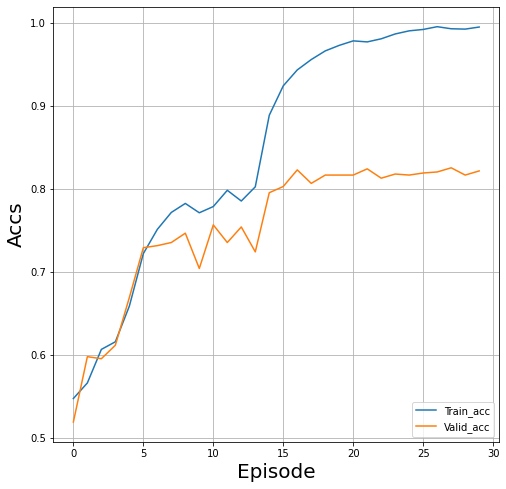

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(Train_acc, label='Train_acc')
plt.plot(Valid_acc, label='Valid_acc')
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Accs', fontsize=20)
plt.legend(loc='lower right')
plt.grid()

Plot the loss curve. We can see that the model starts overfitting the training data after around 15 epochs.

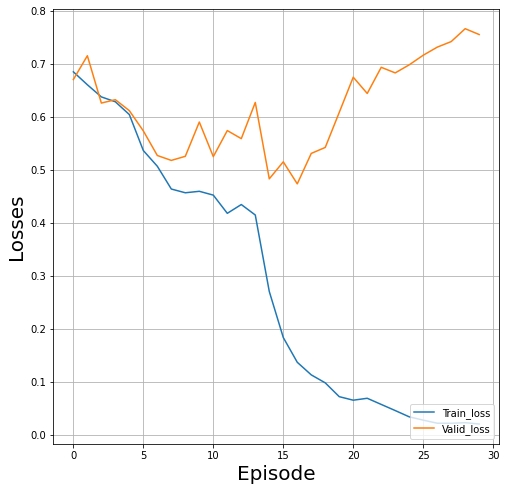

In [33]:
plt.figure(figsize=(8,8))
plt.plot(Train_loss, label='Train_loss')
plt.plot(Valid_loss, label='Valid_loss')
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Losses', fontsize=20)
plt.legend(loc='lower right')
plt.grid()

# Model evaluating

Test the model on our test set. Read the best model saved during our training.

In [36]:
Resnet.load_state_dict(torch.load('checkpoint.pt'))	
test_loss, test_acc = evaluate(Resnet, test_dataloader, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.483 | Test Acc: 79.50%
